<a href="https://colab.research.google.com/github/pedroblossbraga/analise_dados_acidentes_aereos_BR/blob/main/A3Data_Challenge_Pedro_Bloss_Braga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio - A3Data

Neste teste, **analisamos a base de dados "Ocorrências Aeronáuticas na Aviação Civil Brasileira"**.


----------------

# Autor
Pedro Blöss Braga
- email: pedrobloessbraga@gmail.com
- (day/month/year): 15/02/2023

----------------

# Etapas gerais (para um projeto de Data Science, com modelo preditivo):

- **Extração** dos dados
- **Tratamento**: Inicialmente faremos uma etapa de "data wrangling", i.e., tratamento de dados, com ajustes e padronizações pertinentes, além de checagem de inconsistências.
  - tratamento e padronização
  - checagem de inconsistências
- **Análise Exploratória**: 
  - Quais hipóteses relevantes podemos levantar, sobre os dados e o problema? Refutar, testar e averiguar essas hipóteses.
  - Quais são as principais características e padrões dos dados?
  - Existem anomalias, ou pontos de atenção?
  - Qual é o desfecho, o que queremos prever? Qual abordagem tomar?
- **Modelagem**: 
  - Preparação dos dados para os modelos / Pré-processamento: Caso necessário, efetuar *scaling* ou *encoding*.
  - Definição do(s) estimadore(s).
  - Treinamento e validação.
  - Performance do modelo.
- **Resultados**
  - Como serão entregues?
  - Quais são as principais conclusões?

# Bibliotecas básicas

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Extração dos dados

### Conexão com o google drive

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/') #, force_remount=True)

Mounted at /content/drive/


In [ ]:
list(filter(lambda x: 'cd_aero' in x, 
            os.listdir('drive/MyDrive')
            ))

['cd_aeronaves']

In [ ]:
path = 'drive/MyDrive/cd_aeronaves'
os.listdir(path)

['dicionario_de_dados.pdf', 'ocorrencia.csv', 'aeronave.csv']

### carregamento das bases

In [ ]:
import pandas as pd
df_occur = pd.read_csv(
    os.path.join(path, 'ocorrencia.csv')
)
print(df_occur.shape)
df_occur.head()

(2027, 19)


,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,comando_investigador,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,***,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,SIM,SERIPA-7,FINALIZADA,IG-209/CENIPA/2013,1.0,2014-04-07,0,1,NaN,2016-07-30
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,****,2008-08-07,15:10:00,SIM,SERIPA-7,FINALIZADA,A - 517/CENIPA/2016,1.0,2016-07-07,0,1,1.0,2016-07-30
3,44988,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,****,2011-08-11,17:00:00,SIM,SERIPA-7,FINALIZADA,A-105/CENIPA/2012,1.0,2012-09-20,4,1,NaN,2016-07-30
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,****,2009-12-28,17:30:00,SIM,SERIPA-5,ATIVA,A DEFINIR,NaN,NaN,0,1,NaN,2016-07-30


In [ ]:
df_aero = pd.read_csv(
    os.path.join(path, 'aeronave.csv')
)
print(df_aero.shape)
df_aero.head()

(2043, 22)


,codigo_aeronave,codigo_ocorrencia,matricula,codigo_operador,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,peso_maximo_decolagem,...,pais_registro,categoria_registro,categoria_aviacao,origem_voo,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao
0,4,45602,PPGXE,241,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,...,BRASIL,PRI,INSTRUÇÃO,SDPW,SDPW,INDETERMINADA,INSTRUÇÃO,SUBSTANCIAL,NaN,2016-07-30
1,40,53551,PPGSZ,160,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,...,BRASIL,PRI,INSTRUÇÃO,SBBP,SBBP,DECOLAGEM,INSTRUÇÃO,LEVE,NaN,2016-07-30
2,118,43721,PTCMT,1232,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,2.0,2310,...,BRASIL,TPX,TÁXI AÉREO,****,****,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2016-07-30
3,130,35556,PTEQI,3992,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1.0,1633,...,BRASIL,TPP,PARTICULAR,SNDU,SBSL,CORRIDA APÓS POUSO,PRIVADA,LEVE,NaN,2016-07-30
4,191,32579,PPVMM,4365,AVIÃO,BOEING COMPANY,737-241,JATO,2.0,52389,...,BRASIL,TPR,REGULAR,****,****,SUBIDA,REGULAR,NENHUM,NaN,2016-07-30


### checando interseção de variáveis e associações possíveis

In [ ]:
set(df_occur.columns) & set(df_aero.columns)

{'codigo_ocorrencia', 'dia_extracao'}

## Junção das bases

- Como as bases possuem colunas em comum, podemos unificar as informações

In [ ]:
df = df_occur.set_index('codigo_ocorrencia').join(
    other = df_aero.set_index('codigo_ocorrencia'),
    on = 'codigo_ocorrencia',
    how = 'left', # get airplane data for each occurence
    lsuffix = '_occur',
    rsuffix = '_aero'
).reset_index()
df.head()

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,...,pais_registro,categoria_registro,categoria_aviacao,origem_voo,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao_aero
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,***,...,BRASIL,PET,EXPERIMENTAL,****,****,CIRCUITO DE TRÁFEGO,EXPERIMENTAL,SUBSTANCIAL,NaN,2016-07-30
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,SIM,...,BRASIL,TPX,TÁXI AÉREO,SBJI,SSKW,POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2016-07-30
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,****,2008-08-07,15:10:00,SIM,...,BRASIL,TPX,TÁXI AÉREO,SWKK,SWRL,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2016-07-30
3,44988,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,****,2011-08-11,17:00:00,SIM,...,BRASIL,TPX,TÁXI AÉREO,****,****,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2016-07-30
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,****,2009-12-28,17:30:00,SIM,...,BRASIL,SAE,ESPECIALIZADA,****,****,DECOLAGEM,ESPECIALIZADA,SUBSTANCIAL,1.0,2016-07-30


In [ ]:
list(filter(
    lambda x: '_aero' in x or '_occur' in x, 
    df.columns
))

['dia_extracao_occur', 'codigo_aeronave', 'dia_extracao_aero']

In [ ]:
# check if all values are equal
set(
    list(map(
        lambda dt_occur, dt_aero : dt_occur == dt_aero,
        df.dia_extracao_occur.values,
        df.dia_extracao_aero.values
    ))
)

{True}

como os dias de extração são iguais, podemos manter apenas uma variável.

In [ ]:
df['dia_extracao'] = df['dia_extracao_occur']
df = df.drop(['dia_extracao_occur', 'dia_extracao_aero'],
             axis = 1)
df.head()

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,...,pais_registro,categoria_registro,categoria_aviacao,origem_voo,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,***,...,BRASIL,PET,EXPERIMENTAL,****,****,CIRCUITO DE TRÁFEGO,EXPERIMENTAL,SUBSTANCIAL,NaN,2016-07-30
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,SIM,...,BRASIL,TPX,TÁXI AÉREO,SBJI,SSKW,POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2016-07-30
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,****,2008-08-07,15:10:00,SIM,...,BRASIL,TPX,TÁXI AÉREO,SWKK,SWRL,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2016-07-30
3,44988,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,****,2011-08-11,17:00:00,SIM,...,BRASIL,TPX,TÁXI AÉREO,****,****,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2016-07-30
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,****,2009-12-28,17:30:00,SIM,...,BRASIL,SAE,ESPECIALIZADA,****,****,DECOLAGEM,ESPECIALIZADA,SUBSTANCIAL,1.0,2016-07-30


In [ ]:
df['classificacao'] = df['classificacao'].apply(lambda x: x.lower())

# Questões e perguntas

## Em relação às características de Ocorrências
- Quais são as ocorrências mais frequentes?
- Quais são os tipos de aeronave / as características das aeronaves relacionados(as) com as ocorrências mais frequentes?
- Idem - 2 perguntas acima para menos frequentes (caso sejam eventos raros)
- há algum horário e/ou local com maior quantidade de ocorrências? 
- há algum horário e/ou local com maior quantidade de acidentes?
  - quais são as principais causas de acidentes?
  - quando e onde é mais provável ocorrer acidentes?
  - quando e onde é menos provável ocorrer acidentes?
- Quais ocorrências são investigadas? Há algum perfil de ocorrências que deveria ser investigado mas não é?
- Para quais perfis de ocorrências são feitas recomendações? Será que há ocorrências que deveriam ter recomendações e não tem?

## Em relação às características de Aeronaves
- Quais são os fabricantes com mais/menos ocorrências?
- Algum fator da aeronave contribui para as ocorrências, por exemplo:
  - pesos elevados
  - aeronaves mais antigas
- Há origens ou destinos de voo com mais acidentes? 
  - Imagina-se que existem rotas mais ou menos perigosas
- Qual é a relação de nível de dano com ocorrências?

### Quais são as ocorrências mais frequentes?

In [ ]:
df_occur['classificacao'].value_counts()

ACIDENTE           1475
INCIDENTE GRAVE     552
Name: classificacao, dtype: int64

In [ ]:
import plotly.graph_objects as go

temp = pd.DataFrame({
      'classificação': df['classificacao'].value_counts().index,
      'frequência': df['classificacao'].value_counts().values
  })
fig = go.Figure(data=[go.Pie(labels=temp['classificação'].values, 
                             values=temp['frequência'].values, 
                             textinfo='label+percent+value',
                            )])
fig.update_layout(
    width=450,
    height=400,
)
fig.show()

De fato, a proporção de incidentes graves é pequena (cerca de 1 a cada 4 ocorrências).


In [ ]:
df_occur[
    df_occur['classificacao']=='INCIDENTE GRAVE'
][[
    'quantidade_recomendacoes',
   'aeronaves_envolvidas'
]].describe()

,quantidade_recomendacoes,aeronaves_envolvidas
count,552.000000,552.000000
mean,0.541667,1.012681
std,2.005004,0.153076
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,20.000000,4.000000


In [ ]:
len(df[df.classificacao == 'acidente'])/len(df[df.classificacao == 'incidente grave'])

2.6547406082289804

In [ ]:
df_occur[
    df_occur['classificacao']=='acidente'
][[
    'quantidade_recomendacoes',
   'aeronaves_envolvidas'
]].describe()

,quantidade_recomendacoes,aeronaves_envolvidas
count,1475.000000,1475.000000
mean,1.365424,1.006102
std,3.979939,0.077901
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,83.000000,2.000000


In [ ]:
import plotly.express as px
df_occur['classificacao'] = df_occur['classificacao'].apply(lambda x: x.lower())
fig = px.histogram(df_occur, 
                   x="quantidade_recomendacoes", 
                   color="classificacao",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Qtd recomendações por classificação da ocorrência',
    title_x = 0.5,

    width = 800,
    height = 400,

    legend_title = 'Classifição da Ocorrência',

    xaxis = dict(
        title = 'Qtd recomendações'
    ),
    yaxis = dict(
        title = 'Frequência'
    )
)
fig.show()

Em média, a quantidade de recomendações é menor para incidentes graves.


In [ ]:
import plotly.express as px
fig = px.histogram(df_occur, 
                   x="aeronaves_envolvidas", 
                   color="classificacao",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Qtd aeronaves envolvidas por classificação da ocorrência',
    title_x = 0.5,

    width = 500,
    height = 350,

    legend_title = 'Classifição da Ocorrência',

    xaxis = dict(
        title = 'Qtd aeronaves envolvidas'
    ),
    yaxis = dict(
        title = 'Frequência'
    )
)
fig.show()

Casos com muitas aeronaves envolvidas geralmente ocorrem para incidentes graves.


Teste T (nível crítico 0.050)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



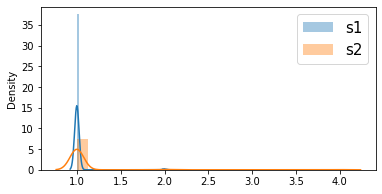

Estatística: -2.755, p-valor: 0.006

Resultado: Distribuições diferentes (rejeita H0)


In [ ]:
from scipy.stats import ttest_ind

def compare_2_dists_mean(s1, s2, alpha):
  print('Teste T (nível crítico {:.3f})'.format(alpha))

  plt.figure(figsize = (6, 3))
  sns.distplot(s1, label = 's1')
  sns.distplot(s2, label = 's2')
  plt.legend(loc='best', fontsize = 15)
  plt.show()

  stat, p = ttest_ind(s1, s2)
  print('Estatística: {:.3f}, p-valor: {:.3f}\n'.format(stat, p))
  if p > alpha:
    print('Resultado: Mesma distribuição (não rejeita H0)')
  else:
    print('Resultado: Distribuições diferentes (rejeita H0)')

compare_2_dists_mean(s1 = df[
                              df['classificacao']=='acidente'
                            ]['aeronaves_envolvidas'].values, 
                     s2 = df[
                              df['classificacao']=='incidente grave'
                            ]['aeronaves_envolvidas'].values, 
                     alpha = 0.05)

Teste T (nível crítico 0.050)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



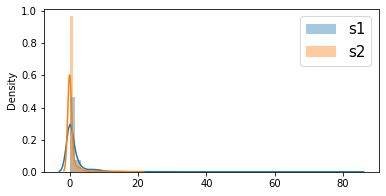

Estatística: 4.550, p-valor: 0.000

Resultado: Distribuições diferentes (rejeita H0)


In [ ]:
compare_2_dists_mean(s1 = df[
                              df['classificacao']=='acidente'
                            ]['quantidade_recomendacoes'].values, 
                     s2 = df[
                              df['classificacao']=='incidente grave'
                            ]['quantidade_recomendacoes'].values, 
                     alpha = 0.05)

### Tipos de incidentes

In [ ]:
df_occur.tipo.value_counts()

FALHA DO MOTOR EM VOO                             377
PERDA DE CONTROLE NO SOLO                         325
PERDA DE CONTROLE EM VOO                          310
COLISÃO EM VOO COM OBSTÁCULO                      142
COM TREM DE POUSO                                 130
OUTROS TIPOS                                       87
PANE SECA                                          74
FALHA DE SISTEMA / COMPONENTE                      61
INDETERMINADA                                      57
POUSO SEM TREM                                     54
POUSO EM LOCAL NÃO PREVISTO                        44
POUSO BRUSCO                                       40
COLISÃO COM OBSTÁCULO NO SOLO                      40
POUSO LONGO                                        30
CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO          27
PERDA DE COMPONENTE EM VOO                         27
CFIT - COLISÃO EM VOO CONTROLADO COM O TERRENO     21
MANOBRAS A BAIXA ALTURA                            16
POUSO ANTES DA PISTA        

In [ ]:
import plotly.express as px
fig = px.histogram(df_occur, 
                   x="tipo", 
                   color="classificacao",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Frequência de tipo x classificação',
    title_x = 0.5
)
fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df_occur, 
                   x="classificacao", 
                   color="tipo",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Frequência de classificação x tipo',
    title_x = 0.5
)
fig.show()

In [ ]:
k = 10
temp = pd.DataFrame({
    'tipo': df.tipo.value_counts().index,
    'freq': df.tipo.value_counts().values
}).head(k)

most_freq_types = temp['tipo'].values

fig = px.histogram(df[df.tipo.isin(most_freq_types)], 
                   x="classificacao", 
                   color="tipo",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Frequência de classificação x tipo',
    title_x = 0.5
)
fig.show()

In [ ]:
k = 10

temp = pd.DataFrame({
    'tipo': df.tipo.value_counts().index,
    'freq': df.tipo.value_counts().values
}).head(k)

most_freq_types = temp['tipo'].values

fig = px.histogram(df[df.tipo.isin(most_freq_types)], 
                   x="tipo", 
                   color="classificacao",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Frequência de tipo x classificação ({} tipos mais frequentes)'.format(k),
    title_x = 0.5,
    width = 700,
    height = 400
)
fig.show()

In [ ]:
k = 10

temp = pd.DataFrame({
    'tipo': df[df.classificacao == 'incidente grave'].tipo.value_counts().index,
    'freq': df[df.classificacao == 'incidente grave'].tipo.value_counts().values
}).head(k)
fig = px.histogram(df[df.tipo.isin(most_freq_types)], 
                   x="tipo", 
                   color="classificacao",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Frequência de tipo x classificação ({} tipos mais frequentes)'.format(k),
    title_x = 0.5,
    width = 700,
    height = 400
)
fig.show()

In [ ]:
K = 15 
temp1 = pd.DataFrame({
    'tipo': df[df.classificacao=='incidente grave'].tipo.value_counts().index,
    'frequência': df[df.classificacao=='incidente grave'].tipo.value_counts().values
}).head(K)
temp1['classificação'] = ['incidente grave']*len(temp1)

temp2 = pd.DataFrame({
    'tipo': df[df.classificacao=='acidente'].tipo.value_counts().index,
    'frequência': df[df.classificacao=='acidente'].tipo.value_counts().values
}).head(K)
temp2['classificação'] = ['acidente']*len(temp2)

pd.concat([temp1, temp2], axis = 0)

,tipo,frequência,classificação
0,PERDA DE CONTROLE NO SOLO,124,incidente grave
1,COM TREM DE POUSO,83,incidente grave
2,FALHA DO MOTOR EM VOO,76,incidente grave
3,POUSO SEM TREM,28,incidente grave
4,FALHA DE SISTEMA / COMPONENTE,26,incidente grave
5,POUSO EM LOCAL NÃO PREVISTO,21,incidente grave
6,OUTROS TIPOS,20,incidente grave
7,PERDA DE CONTROLE EM VOO,16,incidente grave
8,COLISÃO EM VOO COM OBSTÁCULO,15,incidente grave
9,PANE SECA,15,incidente grave


Vamos selecionar os tipos de ocorrências mais frequentes (para as diferentes classificações), e plotar a frequência dos tipos mais incidentes.

In [ ]:
K = 10
temp1 = pd.DataFrame({
    'tipo': df[df.classificacao=='incidente grave'].tipo.value_counts().index,
    'frequência': df[df.classificacao=='incidente grave'].tipo.value_counts().values
}).head(K)
temp1['classificação'] = ['incidente grave']*len(temp1)

temp2 = pd.DataFrame({
    'tipo': df[df.classificacao=='acidente'].tipo.value_counts().index,
    'frequência': df[df.classificacao=='acidente'].tipo.value_counts().values
}).head(K)
temp2['classificação'] = ['acidente']*len(temp2)


fig = px.line_polar(pd.concat([temp1, temp2], 
                              axis = 0).sort_values(by=['tipo'],
                                                    ascending = True), 
                    r="frequência",
                    theta="tipo", 
                    color="classificação", 
                    line_close=True
                    )
fig.update_layout(
    title = 'Frequência por tipo de ocorrência (mais incidentes)',
    title_x = 0.5,
    width = 800,
    height = 500,
    legend = dict(
        yanchor = 'top',
        y = 1.1,
        xanchor = 'left',
        x=-0.1,
        font = dict(
            size = 15
        )
    )
)
fig.show()

Acidentes não graves tem na maioria incidentes por:
- perda de controle
- falha no motor

Já incidentes graves têm como maiores tipos de acidentes: 
- perda de controle no solo
- problemas com trem de pouso
- falha no motor em voo


Entende-se que os seguintes fatores são importantes contribuintes para acidentes:
- motor
- perda de controle em solo e em voo
- trem de pouso




# Checagem de inconsistências

### Valores faltantes

In [ ]:
# checking sum of NaNs per column
df_occur.isna().sum()

codigo_ocorrencia              0
classificacao                  0
tipo                           0
localidade                     0
uf                             0
pais                           0
aerodromo                      3
dia_ocorrencia                 0
horario                        0
sera_investigada               0
comando_investigador           0
status_investigacao          206
numero_relatorio             206
relatorio_publicado         1032
dia_publicacao              1032
quantidade_recomendacoes       0
aeronaves_envolvidas           0
saida_pista                 1771
dia_extracao                   0
dtype: int64

In [ ]:
temp = pd.DataFrame({
    'coluna': df.isna().sum().index,
    'Qtd faltantes': df.isna().sum().values,
    '% faltantes': (df.isna().sum().values)*100/len(df)
}).sort_values(by=['Qtd faltantes'], 
               ascending = False).reset_index(drop=True)
temp[temp['Qtd faltantes']>0]

,coluna,Qtd faltantes,% faltantes
0,saida_pista,1787,87.469408
1,quantidade_fatalidades,1688,82.623593
2,dia_publicacao,1042,51.003426
3,relatorio_publicado,1042,51.003426
4,status_investigacao,209,10.230054
5,numero_relatorio,209,10.230054
6,quantidade_assentos,18,0.881057
7,quantidade_motores,9,0.440529
8,ano_fabricacao,4,0.195791
9,aerodromo,3,0.146843


### Falsos não faltantes

Vamos checar se há valores que deveriam ser faltantes mas estão como string:

In [ ]:
def search_hidden_missing_values(col, data):
  false_not_missing = ['n/a', 'não atribuído', '']

  vals = data[col].unique()
  vals = list(filter(lambda x: x==x, vals)) # filter nans
  return set(filter(
                lambda x: len(set(str(x))) == 1 or x.lower() in false_not_missing,
                vals
            ))

search_hidden_missing_values(col='localidade', 
                             data = df)

def find_inconsistencies(cols, data):
  cols_inconsist, inconsist_values = [], []
  res = 'nothing found!'
  for col in cols:
    l = search_hidden_missing_values(col=col, 
                              data = data)
    if len(l)>0:
      cols_inconsist.append(col)
      inconsist_values = inconsist_values + list(l)
      print('!!!!!! col {} - found: {}'.format(col, l))
      res = 'found inconsitencies!'
  print(res)
  return cols_inconsist, list(set(inconsist_values))

cols_inconsist, inconsist_values = find_inconsistencies(cols = df.select_dtypes(exclude='number'), 
                     data = df)

!!!!!! col uf - found: {'RR', '***'}
!!!!!! col aerodromo - found: {'****'}
!!!!!! col sera_investigada - found: {'***'}
!!!!!! col equipamento - found: {'***'}
!!!!!! col fabricante - found: {'***'}
!!!!!! col modelo - found: {'***'}
!!!!!! col tipo_motor - found: {'***'}
!!!!!! col categoria_registro - found: {'***'}
!!!!!! col categoria_aviacao - found: {'***'}
!!!!!! col origem_voo - found: {'****'}
!!!!!! col destino_voo - found: {'****'}
!!!!!! col tipo_operacao - found: {'***'}
!!!!!! col nivel_dano - found: {'***'}
found inconsitencies!


In [ ]:
# código para fins de apresentação
df[
   (df.uf.isin(['***', '****'])) |\
   (df.aerodromo.isin(['***', '****'])) |\
   (df.sera_investigada.isin(['***', '****'])) |\
   (df.equipamento.isin(['***', '****'])) |\
   (df.fabricante.isin(['***', '****'])) |\
   (df.modelo.isin(['***', '****'])) |\
   (df.tipo_motor.isin(['***', '****'])) |\
   (df.categoria_registro.isin(['***', '****'])) |\
   (df.categoria_aviacao.isin(['***', '****'])) |\
   (df.origem_voo.isin(['***', '****'])) |\
   (df.destino_voo.isin(['***', '****'])) |\
   (df.tipo_operacao.isin(['***', '****'])) |\
   (df.nivel_dano.isin(['***', '****']))
][cols_inconsist]

,uf,aerodromo,sera_investigada,equipamento,fabricante,modelo,tipo_motor,categoria_registro,categoria_aviacao,origem_voo,destino_voo,tipo_operacao,nivel_dano
0,RO,SJOG,***,ULTRALEVE,ORION LTDA,F1A EAGLE,PISTÃO,PET,EXPERIMENTAL,****,****,EXPERIMENTAL,SUBSTANCIAL
2,RO,****,SIM,AVIÃO,EMBRAER,EMB-820C NAVAJO,PISTÃO,TPX,TÁXI AÉREO,SWKK,SWRL,TÁXI AÉREO,SUBSTANCIAL
3,RR,****,SIM,AVIÃO,CESSNA AIRCRAFT,U206G,PISTÃO,TPX,TÁXI AÉREO,****,****,TÁXI AÉREO,SUBSTANCIAL
4,RS,****,SIM,AVIÃO,CESSNA AIRCRAFT,A188B,PISTÃO,SAE,ESPECIALIZADA,****,****,ESPECIALIZADA,SUBSTANCIAL
5,GO,****,***,AVIÃO,IVAN MOLCHAN,GV-2,PISTÃO,PET,EXPERIMENTAL,****,****,EXPERIMENTAL,SUBSTANCIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,EX,****,***,AVIÃO,MCDONNELL DOUGLAS,DC-10-30,PISTÃO,***,***,****,****,***,SUBSTANCIAL
2039,EX,****,***,AVIÃO,MCDONNELL DOUGLAS,DC-10-30F,JATO,TPR,REGULAR,****,****,REGULAR,LEVE
2040,EX,****,***,AVIÃO,CESSNA AIRCRAFT,172RG,PISTÃO,TPP,PARTICULAR,****,****,PRIVADA,***
2041,***,****,SIM,AVIÃO,AIRBUS INDUSTRIE,A330-203,JATO,TPR,REGULAR,LEMD,SBGR,REGULAR,NENHUM


In [ ]:
inconsist_values

['RR', '****', '***']

In [ ]:
cols_inconsist

['uf',
 'aerodromo',
 'sera_investigada',
 'equipamento',
 'fabricante',
 'modelo',
 'tipo_motor',
 'categoria_registro',
 'categoria_aviacao',
 'origem_voo',
 'destino_voo',
 'tipo_operacao',
 'nivel_dano']

In [ ]:
df[df[cols_inconsist[0]]=='***'][cols_inconsist[0]]

2022    ***
2041    ***
Name: uf, dtype: object

In [ ]:
df.replace('****', np.nan).replace('***', np.nan)[df[cols_inconsist[0]]=='***'][cols_inconsist[0]]

2022    NaN
2041    NaN
Name: uf, dtype: object

In [ ]:
df = df.replace('****', np.nan).replace('***', np.nan)
cols_inconsist, inconsist_values = find_inconsistencies(
                    cols = df.select_dtypes(exclude='number'), 
                    data = df)

!!!!!! col uf - found: {'RR'}
found inconsitencies!


### nova quantidade de faltantes

In [ ]:
temp = pd.DataFrame({
    'coluna': df.isna().sum().index,
    'Qtd faltantes': df.isna().sum().values,
    '% faltantes': (df.isna().sum().values)*100/len(df)
}).sort_values(by=['Qtd faltantes'], 
               ascending = False).reset_index(drop=True)
temp[temp['Qtd faltantes']>0]

,coluna,Qtd faltantes,% faltantes
0,saida_pista,1787,87.469408
1,quantidade_fatalidades,1688,82.623593
2,aerodromo,1229,60.156632
3,destino_voo,1204,58.932942
4,origem_voo,1110,54.331865
5,dia_publicacao,1042,51.003426
6,relatorio_publicado,1042,51.003426
7,status_investigacao,209,10.230054
8,numero_relatorio,209,10.230054
9,sera_investigada,206,10.083211


# Análise temporal

## Data da ocorrência

- Será que a data da ocorrência influencia nos dados? 
- ocorrências antigas tem mais chances de já serem investigadas?
- ocorrências mais recentes tem mais valores faltantes sobre status da investigação?

In [ ]:
df[['dia_ocorrencia']].sort_values(by=['dia_ocorrencia']).T

,131,1904,2040,1482,1156,885,1755,1897,1179,1250,...,293,1145,1456,644,300,1942,1594,1566,1254,1304
dia_ocorrencia,2006-01-02,2006-01-02,2006-01-03,2006-01-08,2006-01-12,2006-01-12,2006-01-16,2006-01-20,2006-01-21,2006-01-21,...,2015-12-13,2015-12-13,2015-12-15,2015-12-15,2015-12-15,2015-12-15,2015-12-17,2015-12-24,2015-12-28,2015-12-31


In [ ]:
df.dia_ocorrencia.isna().sum()

0

In [ ]:
'-'.join(df.dia_ocorrencia.values[0].split('-')[:2])

'2013-05'

In [ ]:
df['anomes_ocorrencia'] = list(map(
    lambda dt : '-'.join(dt.split('-')[:2]),
  df.dia_ocorrencia.values
))
df['anomes_ocorrencia'].value_counts()

2014-02    30
2011-07    29
2013-04    29
2013-12    28
2012-12    28
           ..
2008-06     6
2008-05     6
2008-08     6
2007-10     6
2007-05     3
Name: anomes_ocorrencia, Length: 120, dtype: int64

Vamos plotar a quantidade de ocorrências no tempo, e separar por classificação de ocorrência também. 

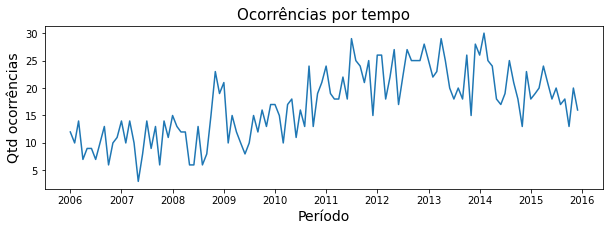

In [ ]:
from datetime import datetime

# time series of occurences per year-month
temp = pd.DataFrame(
        df['anomes_ocorrencia'].value_counts()
    )
# ordering by year-months
temp = temp.reset_index().sort_values(
        by=['index']
    ).set_index('index')

# str to datetime
temp.index = pd.to_datetime(temp.index)

plt.figure(figsize = (10, 3))
plt.title('Ocorrências por tempo', fontsize = 15)
plt.xlabel('Período', fontsize = 14)
plt.ylabel('Qtd ocorrências', fontsize = 14)
plt.plot(temp['anomes_ocorrencia'])

plt.show()

Vemos que a série temporal possui uma quantidade razoável de ruídos, e para entender melhor a evolução (de maneira mais simples e inteligível), vamos adicionar a tendência da série temporal.

<ipython-input-328-0b9f3384ebc8>:24: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead

<ipython-input-328-0b9f3384ebc8>:27: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



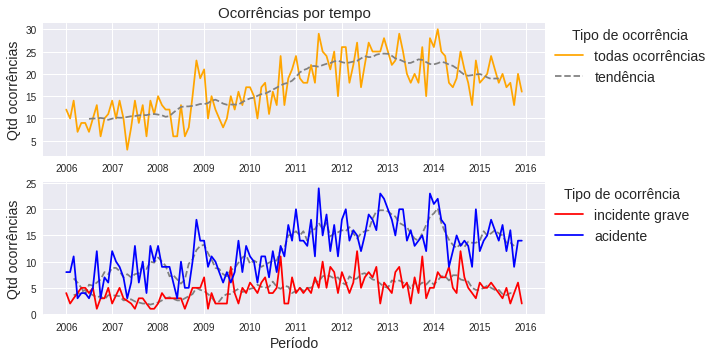

In [ ]:
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use('seaborn')

def get_occur_timeseries(data):
  # time series of occurences per year-month
  temp = pd.DataFrame(
          data['anomes_ocorrencia'].value_counts()
      )
  # ordering by year-months
  temp = temp.reset_index().sort_values(
          by=['index']
      ).set_index('index')

  # str to datetime
  temp.index = pd.to_datetime(temp.index)
  return temp

temp = get_occur_timeseries(data = df)
temp1 = get_occur_timeseries(data = df[df.classificacao == 'incidente grave'])
temp2 = get_occur_timeseries(data = df[df.classificacao == 'acidente'])

decompose_result_mult = seasonal_decompose(temp, model="multiplicative")
decompose_result_mult1 = seasonal_decompose(temp1, 
                                            model="multiplicative",
                                            freq = 5)
decompose_result_mult2 = seasonal_decompose(temp2, 
                                            model="multiplicative",
                                            freq = 5)


plt.figure(figsize = (8, 5))

plt.subplot(2,1,1)
plt.title('Ocorrências por tempo', fontsize = 15)
plt.plot(temp['anomes_ocorrencia'],
         label = 'todas ocorrências',
         color='orange')
plt.plot(decompose_result_mult.trend,
         label = 'tendência',
         linestyle = 'dashed',
         color = 'gray')
plt.ylabel('Qtd ocorrências', fontsize = 14)
plt.legend(
    loc = (1.01, 0.5),
    fontsize = 14,
    title = 'Tipo de ocorrência'
)

plt.subplot(2,1,2)
plt.xlabel('Período', fontsize = 14)
plt.ylabel('Qtd ocorrências', fontsize = 14)

plt.plot(decompose_result_mult1.trend,
         linestyle = 'dashed',
         color = 'gray')
plt.plot(decompose_result_mult2.trend,
         linestyle = 'dashed',
         color = 'gray')

plt.plot(temp1['anomes_ocorrencia'],
         label='incidente grave',
         color='red')
plt.plot(temp2['anomes_ocorrencia'],
         label='acidente',
         color='blue')

plt.legend(
    loc = (1.01, 0.5),
    fontsize = 14,
    title = 'Tipo de ocorrência'
)
plt.show()

In [ ]:
df.columns

Index(['codigo_ocorrencia', 'classificacao', 'tipo', 'localidade', 'uf',
       'pais', 'aerodromo', 'dia_ocorrencia', 'horario', 'sera_investigada',
       'comando_investigador', 'status_investigacao', 'numero_relatorio',
       'relatorio_publicado', 'dia_publicacao', 'quantidade_recomendacoes',
       'aeronaves_envolvidas', 'saida_pista', 'codigo_aeronave', 'matricula',
       'codigo_operador', 'equipamento', 'fabricante', 'modelo', 'tipo_motor',
       'quantidade_motores', 'peso_maximo_decolagem', 'quantidade_assentos',
       'ano_fabricacao', 'pais_registro', 'categoria_registro',
       'categoria_aviacao', 'origem_voo', 'destino_voo', 'fase_operacao',
       'tipo_operacao', 'nivel_dano', 'quantidade_fatalidades', 'dia_extracao',
       'anomes_ocorrencia'],
      dtype='object')

### fatalidades x anomes

In [ ]:
# full time series
def get_time_series_per_class(col, data):
  temp = data[['anomes_ocorrencia', col]].groupby(
      by = 'anomes_ocorrencia'
  ).sum()
  temp.index = pd.to_datetime(temp.index)

  # time series for each class
  temp1 = data[['anomes_ocorrencia', col]][
             data.classificacao == 'incidente grave'
      ].groupby(
      by = 'anomes_ocorrencia'
  ).sum()
  temp1.index = pd.to_datetime(temp1.index)

  temp2 = data[['anomes_ocorrencia', col]][
            data.classificacao == 'acidente'
          ].groupby(
      by = 'anomes_ocorrencia'
  ).sum()
  temp2.index = pd.to_datetime(temp2.index)

  return temp, temp1, temp2

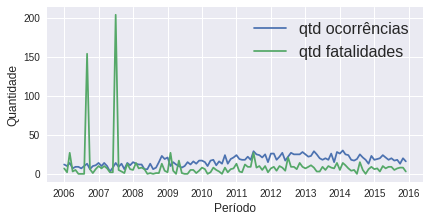

In [ ]:
temp0 = get_occur_timeseries(data = df)
temp0.index._name = 'anomes_ocorrencia'
temp0.columns = ['Qtd ocorrências']

temp, temp1, temp2 = get_time_series_per_class(col = 'quantidade_fatalidades', 
                                                data = df)


plt.figure(figsize=(6,3))
plt.plot(temp0, 
         label = 'qtd ocorrências')
plt.plot(temp, 
         label = 'qtd fatalidades')
plt.legend(
           loc = 'best',
           fontsize = 16)
plt.xlabel('Período', fontsize = 12)
plt.ylabel('Quantidade', fontsize = 12)
plt.show()

Outliers: 2 eventos de taxa de fatalidade muito alta ocorreram, em 09/2006 e 07/2007.

Referências:

- https://g1.globo.com/mato-grosso/noticia/2016/09/acidente-com-aviao-da-gol-que-matou-154-pessoas-completa-10-anos.html

- https://www.cnnbrasil.com.br/nacional/acidente-da-tam-em-congonhas-completa-15-anos-veja-o-que-mudou-na-aviacao-brasileira/



Removendo os outliers:

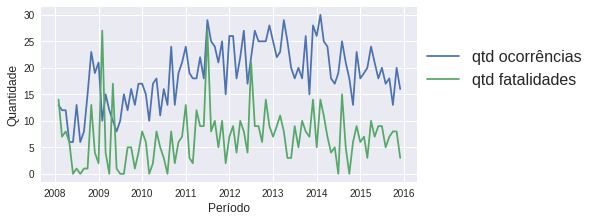

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(temp0[temp0.index > '2008'], 
         label = 'qtd ocorrências')
plt.plot(temp[temp.index > '2008'],
         label = 'qtd fatalidades')
plt.legend(
           loc = (1.01, 0.5),
           fontsize = 16)
plt.xlabel('Período', fontsize = 12)
plt.ylabel('Quantidade', fontsize = 12)
plt.show()

In [ ]:
def corr_time_series(ts1, ts2):
  dates = list(set(ts1.index) | set(ts2.index))
  d = {
      'date': dates,
       'var1': [],
       'var2': []
  }
  for dt in dates:
    if dt not in ts1.index:
      d['var1'].append(np.nan)
    else:
      d['var1'].append(ts1.loc[dt].values[0])

    if dt not in ts2.index:
      d['var2'].append(np.nan)
    else:
      d['var2'].append(ts2.loc[dt].values[0])
  temp = pd.DataFrame(d)

  R = temp['var1'].corr(temp['var2'])
  print('Correlação: {:.3f}'.format(R))

corr_time_series(ts1 = temp0,
                 ts2 = temp)

Correlação: 0.024


In [ ]:
corr_time_series(ts1 = temp0[temp0.index > '2009'],
                 ts2 = temp[temp.index > '2009'])

Correlação: 0.398


## horário de ocorrências

In [ ]:
df['hora'] = df['horario'].apply(lambda x: x.split(':')[0])
df[['hora', 'horario']]

,hora,horario
0,11,11:00:00
1,12,12:32:00
2,15,15:10:00
3,17,17:00:00
4,17,17:30:00
...,...,...
2038,04,04:46:00
2039,00,00:00:00
2040,00,00:00:00
2041,00,00:00:00


In [ ]:
temp = pd.DataFrame({
    'hora': df.hora.value_counts().index,
    'freq': df.hora.value_counts().values
}).sort_values(by=['hora'])
temp = temp.set_index('hora')
temp.head()

,freq
hora,
00,20
01,7
02,9
03,13
04,5


In [ ]:
# highest frequencies
temp.sort_values(by=['freq'], ascending = False).head()

,freq
hora,
20,226
19,197
13,188
12,170
14,168


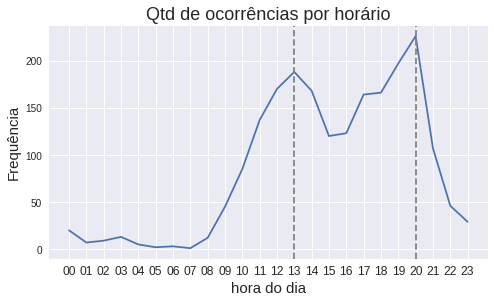

In [ ]:
plt.figure(figsize = (7,4))
plt.title('Qtd de ocorrências por horário',
          fontsize = 18)

plt.axvline(x='13',
            linestyle='dashed',
            color='gray')
plt.axvline(x='20',
            linestyle='dashed',
            color='gray')

plt.plot(temp)
plt.xlabel('hora do dia', fontsize = 15)
plt.ylabel('Frequência', fontsize = 15)
plt.xticks(fontsize = 12)

plt.show()

Na madrugada (00 - 06) o movimento é menor, consequentemente há menos ocorrências.

Há picos de ocorrências às 13h e 20h.

Podem ser horários tipicamente associados a períodos de refeição.


## Ocorrências por mês

In [ ]:
pd.to_datetime(df.dia_ocorrencia.values[0]).month_name()

'May'

In [ ]:
df['mes_ocorrencia'] = df['dia_ocorrencia'].apply(lambda x: pd.to_datetime(x).month)
df[['dia_ocorrencia', 'anomes_ocorrencia', 'mes_ocorrencia']]

,dia_ocorrencia,anomes_ocorrencia,mes_ocorrencia
0,2013-05-05,2013-05,5
1,2013-11-25,2013-11,11
2,2008-08-07,2008-08,8
3,2011-08-11,2011-08,8
4,2009-12-28,2009-12,12
...,...,...,...
2038,2009-03-26,2009-03,3
2039,2006-10-31,2006-10,10
2040,2006-01-03,2006-01,1
2041,2013-09-01,2013-09,9


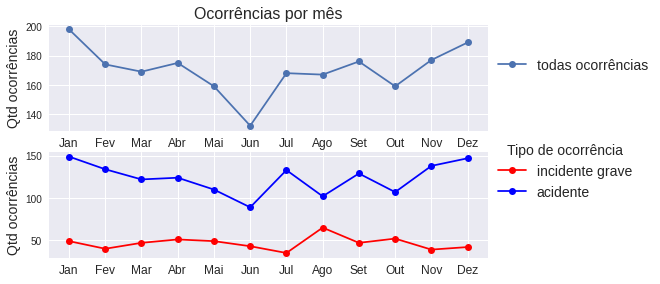

In [ ]:
d = {
    1: 'Jan',
    2: 'Fev',
    3: 'Mar',
     4: 'Abr',
     5: 'Mai',
     6: 'Jun',
     7: 'Jul',
     8: 'Ago',
     9: 'Set',
     10: 'Out',
     11: 'Nov',
     12: 'Dez'
}
temp = pd.DataFrame({
    'month_number': df.mes_ocorrencia.value_counts().index,
    'qtd_occur': df.mes_ocorrencia.value_counts().values,
    'month': list(map(
        lambda x: d[x], df.mes_ocorrencia.value_counts().index
    ))
}).sort_values(by='month_number')

temp1 = pd.DataFrame({
    'month_number': df[
                        df.classificacao == 'incidente grave'
                    ].mes_ocorrencia.value_counts().index,
    'qtd_occur': df[
                        df.classificacao == 'incidente grave'
                    ].mes_ocorrencia.value_counts().values,
    'month': list(map(
        lambda x: d[x], df[
                          df.classificacao == 'incidente grave'
                      ].mes_ocorrencia.value_counts().index
    ))
}).sort_values(by='month_number')

temp2 = pd.DataFrame({
    'month_number': df[
                        df.classificacao == 'acidente'
                    ].mes_ocorrencia.value_counts().index,
    'qtd_occur': df[
                        df.classificacao == 'acidente'
                    ].mes_ocorrencia.value_counts().values,
    'month': list(map(
        lambda x: d[x], df[
                          df.classificacao == 'acidente'
                      ].mes_ocorrencia.value_counts().index
    ))
}).sort_values(by='month_number')


plt.figure(figsize=(7,4))
plt.subplot(2,1,1)
plt.title('Ocorrências por mês', 
          fontsize = 16)
plt.plot(
    temp[['qtd_occur', 'month']].set_index('month'),
    marker='o',
    label = 'todas ocorrências'
)
plt.ylabel('Qtd ocorrências', fontsize = 14)
plt.xticks(
    fontsize = 12
)
plt.legend(
      loc = (1.01, 0.5),
      fontsize = 14,
  )

plt.subplot(2,1,2)
plt.plot(
    temp1[['qtd_occur', 'month']].set_index('month'),
    marker='o',
    label = 'incidente grave',
    color = 'red'
)
plt.plot(
    temp2[['qtd_occur', 'month']].set_index('month'),
    marker='o',
    label = 'acidente',
    color = 'blue'
)
plt.ylabel('Qtd ocorrências', fontsize = 14)
plt.xticks(
    # rotation = -20,
    fontsize = 12
)
plt.legend(
      loc = (1.01, 0.5),
      fontsize = 14,
      title = 'Tipo de ocorrência'
  )
plt.show()

No geral, há menos ocorrências em Junho.

Incidentes graves ocorreram mais em Agosto.

Acidentes aconteceram mais no final e início do ano.


## Evolução dos dados no tempo

In [ ]:
temp = df.groupby(
    by = 'anomes_ocorrencia'
).sum()
temp.index = pd.to_datetime(temp.index)
temp

,codigo_ocorrencia,relatorio_publicado,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,codigo_aeronave,codigo_operador,quantidade_motores,peso_maximo_decolagem,quantidade_assentos,ano_fabricacao,quantidade_fatalidades
anomes_ocorrencia,,,,,,,,,,,,
2006-01-01,318731,2.0,23,12,0.0,98915,30581,16.0,257574,289.0,23781.0,7.0
2006-02-01,280138,3.0,8,10,0.0,103319,42764,13.0,309995,170.0,15886.0,2.0
2006-03-01,372450,4.0,49,14,1.0,122425,50167,19.0,225400,544.0,25825.0,27.0
2006-04-01,187642,2.0,20,7,3.0,43509,12031,9.0,129948,326.0,13924.0,3.0
2006-05-01,243287,3.0,15,9,3.0,53021,33571,15.0,36414,84.0,17826.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,908683,6.0,0,17,6.0,310902,68020,15.0,19037,48.0,31718.0,5.0
2015-09-01,963038,3.0,0,18,5.0,432212,72239,19.0,21516,61.0,31870.0,7.0
2015-10-01,695887,0.0,0,13,2.0,251069,53927,15.0,49828,122.0,23919.0,8.0


In [ ]:
def plot_time_series_col(col, col_name,
                         decomposition_model = 'multiplicative',
                         decomposition_freq = 5,
                         figsize = (6, 5)
                         ):
  temp, temp1, temp2 = get_time_series_per_class(col = col, 
                                                data = df)

  # get trends
  decompose_result_mult = seasonal_decompose(temp, model=decomposition_model)
  decompose_result_mult1 = seasonal_decompose(temp1, 
                                              model=decomposition_model,
                                              freq = decomposition_freq)
  decompose_result_mult2 = seasonal_decompose(temp2, 
                                              model=decomposition_model,
                                              freq = decomposition_freq)

  # --------------------------------
  # plot time series
  plt.figure(figsize = figsize)

  plt.subplot(2,1,1)
  plt.title(f'{col_name} por tempo', fontsize = 15)
  plt.plot(temp[col],
          label = 'todas ocorrências',
          color='orange')
  plt.plot(decompose_result_mult.trend,
          label = 'tendência',
          linestyle = 'dashed',
          color = 'gray')
  plt.ylabel(col_name, fontsize = 14)
  plt.legend(
      loc = (1.01, 0.5),
      fontsize = 14,
      title = 'Tipo de ocorrência'
  )

  plt.subplot(2,1,2)
  plt.xlabel('Período', fontsize = 14)
  plt.ylabel(col_name, fontsize = 14)

  plt.plot(decompose_result_mult1.trend,
          linestyle = 'dashed',
          color = 'gray')
  plt.plot(decompose_result_mult2.trend,
          linestyle = 'dashed',
          color = 'gray')

  plt.plot(temp1[col],
          label='incidente grave',
          color='red')
  plt.plot(temp2[col],
          label='acidente',
          color='blue')

  plt.legend(
      loc = (1.01, 0.5),
      fontsize = 14,
      title = 'Tipo de ocorrência'
  )
  plt.show()

In [ ]:
temp, temp1, temp2 = get_time_series_per_class(col = 'quantidade_fatalidades', 
                                                data = df)
temp[temp['quantidade_fatalidades'] > temp['quantidade_fatalidades'].mean()]

,quantidade_fatalidades
anomes_ocorrencia,
2006-03-01,27.0
2006-09-01,154.0
2007-01-01,10.0
2007-03-01,10.0
2007-07-01,204.0
2007-11-01,13.0
2008-02-01,14.0
2008-11-01,13.0
2009-02-01,27.0


<ipython-input-193-5f21a57ab098>:36: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead

<ipython-input-193-5f21a57ab098>:39: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



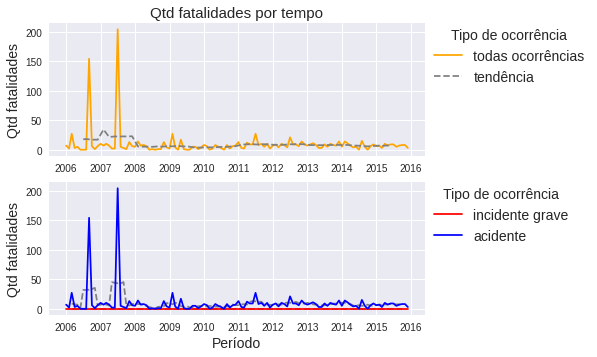

In [ ]:
plot_time_series_col(
    col = 'quantidade_fatalidades',
    col_name = 'Qtd fatalidades',
    decomposition_model = 'additive' # because of null and/or negatives
 )

<ipython-input-193-5f21a57ab098>:36: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead

<ipython-input-193-5f21a57ab098>:39: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



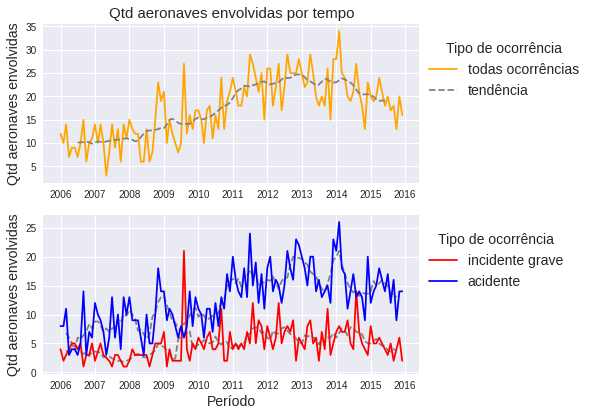

In [ ]:
plot_time_series_col(
    col = 'aeronaves_envolvidas',
    col_name = 'Qtd aeronaves envolvidas',
    decomposition_model = 'multiplicative',
    figsize = (6,6)
 )

A qtd de ocorrências teve crescimento até 2013, e depois leve decaimento.


# Locais e rotas

Naturalmente, aeroportos mais movimentados tem maior espaço amostral para acidentes. 

Então, espera-se que existam mais acidentes para localidades como: 
São Paulo, Brasília, Rio de Janeiro, Recife, BH, Porto Alegre.



In [ ]:
df.columns

Index(['codigo_ocorrencia', 'classificacao', 'tipo', 'localidade', 'uf',
       'pais', 'aerodromo', 'dia_ocorrencia', 'horario', 'sera_investigada',
       'comando_investigador', 'status_investigacao', 'numero_relatorio',
       'relatorio_publicado', 'dia_publicacao', 'quantidade_recomendacoes',
       'aeronaves_envolvidas', 'saida_pista', 'codigo_aeronave', 'matricula',
       'codigo_operador', 'equipamento', 'fabricante', 'modelo', 'tipo_motor',
       'quantidade_motores', 'peso_maximo_decolagem', 'quantidade_assentos',
       'ano_fabricacao', 'pais_registro', 'categoria_registro',
       'categoria_aviacao', 'origem_voo', 'destino_voo', 'fase_operacao',
       'tipo_operacao', 'nivel_dano', 'quantidade_fatalidades', 'dia_extracao',
       'anomes_ocorrencia', 'hora', 'mes_ocorrencia'],
      dtype='object')

In [ ]:
df[['saida_pista', 'pais_registro', 'localidade', 'uf',
    'categoria_registro', 'origem_voo', 'destino_voo']]

,saida_pista,pais_registro,localidade,uf,categoria_registro,origem_voo,destino_voo
0,NaN,BRASIL,ARIQUEMES,RO,PET,NaN,NaN
1,NaN,BRASIL,CACOAL,RO,TPX,SBJI,SSKW
2,1.0,BRASIL,CEREJEIRAS,RO,TPX,SWKK,SWRL
3,NaN,BRASIL,AMAJARI,RR,TPX,NaN,NaN
4,NaN,BRASIL,ACEGUÁ,RS,SAE,NaN,NaN
...,...,...,...,...,...,...,...
2038,NaN,ESTADOS UNIDOS,MEDELLIN,EX,NaN,NaN,NaN
2039,NaN,BRASIL,LIMA,EX,TPR,NaN,NaN
2040,NaN,BRASIL,MENDONZA,EX,TPP,NaN,NaN
2041,NaN,BRASIL,ÁGUAS INTERNACIONAIS,NaN,TPR,LEMD,SBGR


In [ ]:
df.pais_registro.value_counts()

BRASIL              2000
ESTADOS UNIDOS        22
PARAGUAI               7
PORTUGAL               2
PERU                   1
FRANÇA                 1
ANGOLA                 1
ESPANHA                1
URUGUAI                1
ALEMANHA               1
ARGENTINA              1
NÃO IDENTIFICADO       1
ÁFRICA DO SUL          1
RÚSSIA                 1
POLÔNIA                1
ARÁBIA SAUDITA         1
Name: pais_registro, dtype: int64

Como esperado, o país de registro mais dominante é o Brasil. Assim, pode ser inviável fazer comparações com as outras categorias, pois estas possuem frequência muito baixa.

In [ ]:
df.origem_voo.value_counts()

SBMT    34
SBJR    18
SWNV    17
SBJC    15
SBBI    15
        ..
SNJP     1
SWKK     1
SNQV     1
SNSH     1
LIMC     1
Name: origem_voo, Length: 392, dtype: int64

In [ ]:
df[df.classificacao == 'incidente grave'].pais_registro.value_counts().head(10)

BRASIL            547
ESTADOS UNIDOS      6
PORTUGAL            2
FRANÇA              1
ANGOLA              1
ARGENTINA           1
ÁFRICA DO SUL       1
Name: pais_registro, dtype: int64

In [ ]:
df[df.classificacao == 'incidente grave'].localidade.value_counts().head(10)

RIO DE JANEIRO    27
SÃO PAULO         20
BRASÍLIA          19
GOIÂNIA           18
BELO HORIZONTE    12
SALVADOR          11
PORTO ALEGRE      11
BELÉM              9
CURITIBA           9
MANAUS             9
Name: localidade, dtype: int64

In [ ]:
def plot_most_freq_categories(
    col,
    K = 10
):
  temp1 = pd.DataFrame({
      col: df[df.classificacao=='incidente grave'][col].value_counts().index,
      'frequência': df[df.classificacao=='incidente grave'][col].value_counts().values
  }).head(K)
  temp1['classificação'] = ['incidente grave']*len(temp1)
  temp1['ordem'] = temp1.index # set initial order of theta labels

  theta = temp1[col].values

  temp2 = pd.DataFrame({
      col: df[df.classificacao=='acidente'][col].value_counts().index,
      'frequência': df[df.classificacao=='acidente'][col].value_counts().values
  }).head(K)
  temp2['classificação'] = ['acidente']*len(temp2)

  # set order corresponding to the first table -> or a fixed value if its a new value
  temp2['ordem'] = list(map(
      lambda x: temp1[temp1[col]==x]['ordem'].values[0] if x in temp1[col].unique() 
              else K+1,
              temp2[col].values
  ))

  fig = px.line_polar(pd.concat([temp1, temp2], 
                                axis = 0).sort_values(by=['ordem']), 
                      r="frequência",
                      theta=col, 
                      color="classificação", 
                      line_close=True
                      )
  fig.update_layout(
      title = 'Frequência por {} de ocorrência (mais incidentes)'.format(col),
      title_x = 0.5,
      width = 800,
      height = 500,
      legend = dict(
          yanchor = 'top',
          y = 1.1,
          xanchor = 'left',
          x=-0.1,
          font = dict(
              size = 15
          )
      )
  )
  fig.show()


plot_most_freq_categories(col='localidade')

In [ ]:
plot_most_freq_categories(col='uf')

Localidades com aeroportos não tão movimentados tiveram altas frequências de ocorrências:
Manaus, Campo Grande, Goiânia.


In [ ]:
df[df.classificacao == 'acidente'].localidade.value_counts().head(10)

RIO DE JANEIRO       38
SÃO PAULO            30
GOIÂNIA              24
MANAUS               20
CAMPO GRANDE         19
BRAGANÇA PAULISTA    14
JUNDIAÍ              14
BELO HORIZONTE       14
LONDRINA             14
BRASÍLIA             12
Name: localidade, dtype: int64

In [ ]:
df[df.classificacao == 'incidente grave'].origem_voo.value_counts().head(10)

SBMT    6
SBBI    6
SBBR    5
SBRJ    5
SBJC    5
SBSP    4
SWNV    4
SBJR    4
SBBP    4
SBSJ    4
Name: origem_voo, dtype: int64

In [ ]:
df[df.classificacao == 'acidente'].origem_voo.value_counts().head(10)

SBMT    28
SBJR    14
SWNV    13
SBJD    12
SBLO    11
SBBH    11
SBJC    10
SBGO    10
SBSV    10
SBEG     9
Name: origem_voo, dtype: int64

In [ ]:
temp = df[['origem_voo', 'destino_voo', 'classificacao']].copy()
temp['origem-destino'] = temp['origem_voo'] + '-' + temp['destino_voo']
temp[['origem-destino', 'classificacao']].value_counts()

origem-destino  classificacao  
SBMT-SBMT       acidente           13
SWNV-SWNV       acidente            8
SBBP-SBBP       acidente            6
SBLO-SBLO       acidente            6
SBJR-SBJR       acidente            6
                                   ..
SBRJ-SBBR       incidente grave     1
SBRJ-SBCF       incidente grave     1
SBRJ-SBGL       acidente            1
SBRJ-SBPR       acidente            1
SWZQ-SBGO       incidente grave     1
Length: 667, dtype: int64

In [ ]:
temp = df[['origem_voo', 'destino_voo', 'classificacao']].copy()
temp['origem-destino'] = temp['origem_voo'] + '-' + temp['destino_voo']

temp = pd.DataFrame({
    'origem-destino': temp['origem-destino'].value_counts().index,
    'values': temp['origem-destino'].value_counts().values,
    'source_label': list(map(lambda x: x.split('-')[0],
                       temp['origem-destino'].value_counts().index
                       )),
    'target_label': list(map(lambda x: x.split('-')[1],
                       temp['origem-destino'].value_counts().index
                       ))
})
temp['source_index'] = list(map(
    lambda x: list(temp['source_label'].values).index(x),
    temp['source_label'].values
))
temp['target_index'] = list(map(
    lambda x: list(temp['target_label'].values).index(x),
    temp['target_label'].values
))
temp.head(10)

,origem-destino,values,source_label,target_label,source_index,target_index
0,SBMT-SBMT,15,SBMT,SBMT,0,0
1,SWNV-SWNV,11,SWNV,SWNV,1,1
2,SBBP-SBBP,9,SBBP,SBBP,2,2
3,SBJR-SBJR,9,SBJR,SBJR,3,3
4,SBJD-SBJD,8,SBJD,SBJD,4,4
5,SBLO-SBLO,7,SBLO,SBLO,5,5
6,SSBL-SSBL,6,SSBL,SSBL,6,6
7,SBSJ-SBSJ,5,SBSJ,SBSJ,7,7
8,SSNG-SSNG,5,SSNG,SSNG,8,8
9,SBPR-SBPR,4,SBPR,SBPR,9,9


In [ ]:
temp[
    temp['source_label'] != temp['target_label']
][['source_label', 'target_label', 'values']].reset_index(drop=True)

,source_label,target_label,values
0,SWFN,SWBR,3
1,SBTF,SWFN,3
2,SBIZ,SBBE,3
3,SBRF,SBMO,3
4,SBJR,SBMT,3
...,...,...,...
490,SDCO,SBCA,1
491,SSAY,SSOQ,1
492,SBPL,SWBE,1
493,SBDN,SSJI,1


# Tipos de motor

In [ ]:
def find_column(s, data):
  return list(filter(lambda x: s in x.lower(),
                     data.columns))

In [ ]:
find_column('motor', df)

['tipo_motor', 'quantidade_motores']

In [ ]:
df.tipo_motor.value_counts()

PISTÃO        1601
TURBOEIXO      148
TURBOÉLICE     139
JATO           117
SEM TRAÇÃO      10
Name: tipo_motor, dtype: int64

In [ ]:
df.quantidade_motores.value_counts()

1.0    1490
2.0     502
0.0      31
3.0       7
4.0       4
Name: quantidade_motores, dtype: int64

In [ ]:
fig = px.histogram(df, 
                   x="quantidade_motores", 
                   color="classificacao",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Frequência de quantidade_motores x classificação',
    title_x = 0.5,
    width = 600,
    height = 400,
    xaxis = dict(title = 'Qtd Motores'),
    yaxis = dict(title = 'Frequência'),
    legend = dict(title = 'Classificação')
)
fig.show()

Para acidentes não graves, geralmente há 1 motor. 
Para acidentes graves, há uma distribuição similar de 1 e 2 (qtd motores).


In [ ]:
fig = px.histogram(df, 
                   x="tipo_motor", 
                   color="classificacao",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Frequência de tipo_motor x classificação',
    title_x = 0.5,
    width = 600,
    height = 400,
    xaxis = dict(title = 'Tipo de Motor'),
    yaxis = dict(title = 'Frequência'),
    legend = dict(title = 'Classificação')
)
fig.show()

Não há diferenças estatisticamente significantes.
O tipo de motor "Pistão" é o mais frequente, e também é o que tem mais acidentes graves.


In [ ]:
df.columns

Index(['codigo_ocorrencia', 'classificacao', 'tipo', 'localidade', 'uf',
       'pais', 'aerodromo', 'dia_ocorrencia', 'horario', 'sera_investigada',
       'comando_investigador', 'status_investigacao', 'numero_relatorio',
       'relatorio_publicado', 'dia_publicacao', 'quantidade_recomendacoes',
       'aeronaves_envolvidas', 'saida_pista', 'codigo_aeronave', 'matricula',
       'codigo_operador', 'equipamento', 'fabricante', 'modelo', 'tipo_motor',
       'quantidade_motores', 'peso_maximo_decolagem', 'quantidade_assentos',
       'ano_fabricacao', 'pais_registro', 'categoria_registro',
       'categoria_aviacao', 'origem_voo', 'destino_voo', 'fase_operacao',
       'tipo_operacao', 'nivel_dano', 'quantidade_fatalidades', 'dia_extracao',
       'anomes_ocorrencia', 'hora', 'mes_ocorrencia'],
      dtype='object')

# Fabricantes

In [ ]:
find_column('fabricante', df)

['fabricante']

In [ ]:
df.fabricante.value_counts()

NEIVA INDUSTRIA AERONAUTICA            388
CESSNA AIRCRAFT                        354
PIPER AIRCRAFT                         157
EMBRAER                                155
AERO BOERO                             126
                                      ... 
DOREEDSON RIBEIRO PEREIRA                1
SAFARI HELICOPTER CO. INTERNATIONAL      1
AEROTEC                                  1
HENRIQUE HAMILTON CERQUEIRA SANTOS       1
WZQ-OKECIE                               1
Name: fabricante, Length: 119, dtype: int64

In [ ]:
df.fabricante.value_counts().head(20)

NEIVA INDUSTRIA AERONAUTICA    388
CESSNA AIRCRAFT                354
PIPER AIRCRAFT                 157
EMBRAER                        155
AERO BOERO                     126
BEECH AIRCRAFT                 117
ROBINSON HELICOPTER            117
BELL HELICOPTER                 40
HELIBRAS                        39
BOEING COMPANY                  34
EUROCOPTER FRANCE               33
AIR TRACTOR                     26
CIA AERONAUTICA PAULISTA        24
CIRRUS DESIGN                   24
AIRBUS INDUSTRIE                20
AEROSPATIALE AND ALENIA         18
SIKORSKY AIRCRAFT               13
AEROMOT                         12
RAYTHEON AIRCRAFT               12
AGUSTA                          11
Name: fabricante, dtype: int64

In [ ]:
most_freq_manufacturers = df.fabricante.value_counts().head(20).index

fig = px.histogram(df[
    df.fabricante.isin(most_freq_manufacturers)
], 
                   x="fabricante", 
                   color="classificacao",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Frequência de fabricante x classificação (20 mais incidentes)',
    title_x = 0.5,
    width = 750,
    height = 500,
    xaxis = dict(title = 'Fabricante'),
    yaxis = dict(title = 'Frequência'),
    legend = dict(title = 'Classificação')
)
fig.show()

A distribuição de fabricantes por classificações de ocorrência é bastante similar.

Há fabricantes com maior frequência de ocorrência, mas podem ser fabricantes mais comuns.


In [ ]:
df[
    df.fabricante.isin(
        list(df.fabricante.value_counts().head(5).index)
    )
]['localidade'].value_counts().head(10)

GOIÂNIA              33
CAMPO GRANDE         18
MANAUS               17
BELO HORIZONTE       16
LONDRINA             16
BRAGANÇA PAULISTA    15
BELÉM                14
SÃO PAULO            14
PORTO ALEGRE         13
RIO DE JANEIRO       13
Name: localidade, dtype: int64

In [ ]:
most_freq_manufacturers = df.fabricante.value_counts().head(20).index

# most freq locals for most freq manufacturers

temp = df[
    df.fabricante.isin(
          list(df.fabricante.value_counts().head(5).index)
      )
  ]['localidade'].value_counts().head(10).index


fig = px.histogram(df[
    df.fabricante.isin(most_freq_manufacturers) & \
    df.localidade.isin(temp)
], 
                   x="fabricante", 
                   color="localidade",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Frequência: fabricantes mais incidentes e seus locais mais incidentes',
    title_x = 0.5,
    width = 700,
    height = 600,
    xaxis = dict(title = 'fabricante'),
    yaxis = dict(title = 'Frequência'),
    legend = dict(title = 'localidade')
)
fig.show()

Para identificar se os fabricantes são mais comuns, vemos os locais.

Locais com alta taxa de acidentes e baixo tráfego aéreo relativo são frequentes nos fabricantes suspeitos: (Goiânia, Campo Grande, Manaus)


# Idade das aeronaves

In [ ]:
find_column('idade', df)

['localidade',
 'quantidade_recomendacoes',
 'quantidade_motores',
 'quantidade_assentos',
 'quantidade_fatalidades']

In [ ]:
df.columns

Index(['codigo_ocorrencia', 'classificacao', 'tipo', 'localidade', 'uf',
       'pais', 'aerodromo', 'dia_ocorrencia', 'horario', 'sera_investigada',
       'comando_investigador', 'status_investigacao', 'numero_relatorio',
       'relatorio_publicado', 'dia_publicacao', 'quantidade_recomendacoes',
       'aeronaves_envolvidas', 'saida_pista', 'codigo_aeronave', 'matricula',
       'codigo_operador', 'equipamento', 'fabricante', 'modelo', 'tipo_motor',
       'quantidade_motores', 'peso_maximo_decolagem', 'quantidade_assentos',
       'ano_fabricacao', 'pais_registro', 'categoria_registro',
       'categoria_aviacao', 'origem_voo', 'destino_voo', 'fase_operacao',
       'tipo_operacao', 'nivel_dano', 'quantidade_fatalidades', 'dia_extracao',
       'anomes_ocorrencia', 'hora', 'mes_ocorrencia'],
      dtype='object')

In [ ]:
df.ano_fabricacao.value_counts().head(20)

0.0       87
1980.0    82
1976.0    81
1992.0    80
1974.0    69
1973.0    65
1977.0    63
1979.0    61
1993.0    61
1981.0    60
2007.0    57
1990.0    53
2008.0    50
2010.0    46
1978.0    45
1991.0    42
1998.0    42
2006.0    41
2012.0    41
1975.0    39
Name: ano_fabricacao, dtype: int64

In [ ]:
fig = px.histogram(df[
    df.ano_fabricacao > 0 # ano 0 -> inconsistência
    ],
                   x="ano_fabricacao", 
                   color="classificacao",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Frequência de ano de fabricação x classificação',
    title_x = 0.5,
    width = 750,
    height = 500,
    xaxis = dict(title = 'Ano de fabricação'),
    yaxis = dict(title = 'Frequência'),
    legend = dict(title = 'Classificação')
)
fig.show()

Em média, há mais ocorrências para aeronaves com anos de fabricação mais antigos, nos anos 80 e nos anos 90.


Será que locais com muitos acidentes usam aeronaves antigas? 

In [ ]:
temp = pd.DataFrame({
      'localidade': df[df.classificacao=='incidente grave']['localidade'].value_counts().index,
      'frequência': df[df.classificacao=='incidente grave']['localidade'].value_counts().values
  }).head(10)
temp

,localidade,frequência
0,RIO DE JANEIRO,27
1,SÃO PAULO,20
2,BRASÍLIA,19
3,GOIÂNIA,18
4,BELO HORIZONTE,12
5,SALVADOR,11
6,PORTO ALEGRE,11
7,BELÉM,9
8,CURITIBA,9
9,MANAUS,9


In [ ]:
locais_sel = ['MANAUS',
              'GOIÂNIA',
              'CAMPO GRANDE', 
              'BELÉM']
fig = px.histogram(df[
    (df.localidade.isin(locais_sel)) &\
    (df.ano_fabricacao > 0) # ano 0 -> inconsistência
    ],
                   x="ano_fabricacao", 
                   color="localidade",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Frequência de ano de fabricação x localidade <br>(locais menos movimentados)',
    title_x = 0.5,
    width = 550,
    height = 400,
    xaxis = dict(title = 'Ano de fabricação'),
    yaxis = dict(title = 'Frequência'),
    legend = dict(title = 'localidade')
)
fig.show()

In [ ]:
locais_sel = ['SÃO PAULO',
              'RIO DE JANEIRO',
              'BRASÍLIA',
              'BELO HORIZONTE',
              'PORTO ALEGRE',
              'CURITIBA']
fig = px.histogram(df[
    (df.localidade.isin(locais_sel)) &\
    (df.ano_fabricacao > 0) # ano 0 -> inconsistência
    ],
                   x="ano_fabricacao", 
                   color="localidade",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Frequência de ano de fabricação x localidade <br>(locais mais movimentados)',
    title_x = 0.5,
    width = 550,
    height = 400,
    xaxis = dict(title = 'Ano de fabricação'),
    yaxis = dict(title = 'Frequência'),
    legend = dict(title = 'localidade')
)
fig.show()

Locais sem muito tráfego e alta taxa de ocorrências possuem aeronaves mais antigas, comparando às idades de aeronaves de locais mais movimentados (SP, RJ, …)


# Peso

In [ ]:
df.peso_maximo_decolagem.value_counts()

1800      205
770       111
1633       97
2073       63
1315       61
         ... 
148327      1
3921        1
79000       1
1739        1
570         1
Name: peso_maximo_decolagem, Length: 320, dtype: int64

In [ ]:
fig = px.histogram(df[
    df.peso_maximo_decolagem > 0
    ],
                   x="peso_maximo_decolagem", 
                   color="classificacao",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Frequência de peso_maximo_decolagem x classificação',
    title_x = 0.5,
    width = 750,
    height = 500,
    xaxis = dict(title = 'Peso máx'),
    yaxis = dict(title = 'Frequência'),
    legend = dict(title = 'Classificação')
)
fig.show()

A distribuição de pesos varia bastante: podem haver inconsistências sobre a unidade de medida? (mistura de Kg com toneladas, ...)

In [ ]:
fig = px.histogram(df[
    df.peso_maximo_decolagem > 5000
    ],
                   x="peso_maximo_decolagem", 
                   color="classificacao",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Frequência de peso_maximo_decolagem x classificação',
    title_x = 0.5,
    width = 750,
    height = 500,
    xaxis = dict(title = 'Peso máx'),
    yaxis = dict(title = 'Frequência'),
    legend = dict(title = 'Classificação')
)
fig.show()

# nivel_dano

In [ ]:
df.nivel_dano.value_counts()

SUBSTANCIAL    1193
DESTRUÍDA       352
LEVE            261
NENHUM          168
Name: nivel_dano, dtype: int64

In [ ]:
fig = px.histogram(df,
                   x="nivel_dano", 
                   color="classificacao",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Frequência de nivel_dano x classificação',
    title_x = 0.5,
    width = 600,
    height = 450,
    xaxis = dict(title = 'nível de dano'),
    yaxis = dict(title = 'Frequência'),
    legend = dict(title = 'Classificação')
)
fig.show()

Contraintuitivamente, incidentes graves possuem mais níveis baixos de danificação.


In [ ]:
locais_sel = ['MANAUS',
              'GOIÂNIA',
              'CAMPO GRANDE', 
              'BELÉM']
fig = px.histogram(df[df.localidade.isin(locais_sel)],
                   x="nivel_dano", 
                   color="localidade",
                   marginal="violin"
                   )

fig.update_layout(
    title = 'Frequência de nivel_dano x localidade',
    title_x = 0.5,
    width = 550,
    height = 400,
    xaxis = dict(title = 'Nível dano'),
    yaxis = dict(title = 'Frequência'),
    legend = dict(title = 'localidade')
)
fig.show()

In [ ]:
locais_sel = ['SÃO PAULO',
              'RIO DE JANEIRO',
              'BRASÍLIA',
              'BELO HORIZONTE',
              'PORTO ALEGRE',
              'CURITIBA']
fig = px.histogram(df[df.localidade.isin(locais_sel)],
                   x="nivel_dano", 
                   color="localidade",
                   marginal="violin"
                   )

fig.update_layout(
    title = 'Frequência de nivel_dano x localidade',
    title_x = 0.5,
    width = 550,
    height = 400,
    xaxis = dict(title = 'Nível dano'),
    yaxis = dict(title = 'Frequência'),
    legend = dict(title = 'localidade')
)
fig.show()

Locais sem muito tráfego e alta taxa de ocorrências possuem uma proporção maior de dano "substancial" e "destruída", comparando às idades de aeronaves de locais mais movimentados (SP, RJ, …)


Aeronaves mais antigas sofrem mais dano? 

In [ ]:
fig = px.histogram(df[
                      (df.ano_fabricacao > 0) & \
                      (~df.nivel_dano.isna())
                    ],
                   x="ano_fabricacao", 
                   color="nivel_dano",
                   marginal="violin"
                   )
fig.update_layout(
    title = 'Frequência de ano_fabricacao x nivel_dano',
    title_x = 0.5,
    width = 750,
    height = 500,
    xaxis = dict(title = 'ano_fabricacao'),
    yaxis = dict(title = 'Frequência'),
    legend = dict(title = 'nivel_dano')
)
fig.show()

Aparentemente a distribuição de ano de fabricação por nível de dano é bastante homogênea, sem diferenças aparentes.

# Associações entre variáveis

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

,codigo_ocorrencia,relatorio_publicado,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,codigo_aeronave,codigo_operador,quantidade_motores,peso_maximo_decolagem,quantidade_assentos,ano_fabricacao,quantidade_fatalidades
codigo_ocorrencia,1.000000,0.055064,-0.250851,0.015820,0.137218,0.452615,0.088649,-0.110119,-0.090905,-0.119589,-0.018598,-0.141097
relatorio_publicado,0.055064,1.000000,-0.059503,0.006843,-0.017815,-0.035806,-0.005452,-0.013757,-0.041677,-0.099469,-0.014811,0.014165
quantidade_recomendacoes,-0.250851,-0.059503,1.000000,0.078889,-0.007792,-0.087150,0.007823,0.096192,0.081879,0.177362,0.032758,0.846859
aeronaves_envolvidas,0.015820,0.006843,0.078889,1.000000,nan,0.057814,0.003785,0.039331,0.008860,0.008496,-0.074755,0.232064
saida_pista,0.137218,-0.017815,-0.007792,nan,1.000000,0.057222,0.033260,0.059549,0.055302,0.054547,0.161960,0.209707
codigo_aeronave,0.452615,-0.035806,-0.087150,0.057814,0.057222,1.000000,0.246361,-0.066864,0.098372,-0.073803,-0.230952,-0.059915
codigo_operador,0.088649,-0.005452,0.007823,0.003785,0.033260,0.246361,1.000000,0.133143,0.125426,0.124476,-0.067004,0.020221
quantidade_motores,-0.110119,-0.013757,0.096192,0.039331,0.059549,-0.066864,0.133143,1.000000,0.399178,0.358753,0.040135,0.215512
peso_maximo_decolagem,-0.090905,-0.041677,0.081879,0.008860,0.055302,0.098372,0.125426,0.399178,1.000000,0.589397,-0.178393,0.963475
quantidade_assentos,-0.119589,-0.099469,0.177362,0.008496,0.054547,-0.073803,0.124476,0.358753,0.589397,1.000000,0.050194,0.973017


Poderia fazer mais testes estatísticos para determinar independência entre variáveis, caso tivesse mais tempo e fosse relevante.

Para variáveis não numéricas, podemos usar o "Cramer's V", que faz um teste de contingência, para determinar um valor numérico para a associação entre variáveis.

# Conclusões


Potenciais pontos de atenção:
- Problemas:
  - em motor
  - perda de controle (em solo e em voo)
  - trem de pouso
- Período: 
  - meses de extremidades (Janeiro/Dezembro),
  - horários 13h e 20h.  
- Locais e rotas: Goiânia, Manaus, Campo Grande
- Motor: quantidade 2
- Fabricantes suspeitos
- Ano de fabricação antigo


      Voos com características suspeitas de 
      alta probabilidade de acidentes podem 
      ser monitorados com cautela.



# Outras possibilidades de análises


- Poderíamos buscar inferir perfis de alta associação com acidentes, estimando clusters, com K-Means, por exemplo.

- Poderíamos verificar associações entre as informações (ex: data de ocorrência x tipo de ocorrência, etc).

- Poderíamos fazer um diagrama de Sankey, para identificar quais rotas são mais frequentes, e quais rotas estão mais associadas a acidentes graves.